<h1> DS102 Project - Analysis and Prediction on the number of cars on SG road </h1>
<h2> Team members:</h2> 1. Megan Ng Jing En 

<h3>Problem Statement</h3> 

As a tiny red dot, Singapore faces the challange of land scarcity.The  Land Transport Authority (LTA) has limit the number of cars on its roads and elevating the cost of owning a car in an effort to reduce the number of vehicles on the road.It does this through a system which requires bidding for the right to own and use a vehicle for a limited number of years, known as a Certificate of Entitlement (COE). 

<h3>Project Objective </h3>

This project aims to investigate the relationship between the number of cars on the road and factors such as Singapore's population size, premium cost of COE, Singaporean's monthly income and the number of succesful COE bids year on year. By understanding the factors influencing the number of cars on our road, our government can also better managed traffic flow and congestion.I will attempt to build a mutiple linear regression model to predict the number of cars on the road.

<h3>Dataset</h3>

In total 3 different datasets would be combined to form the final_data for this project. The first dataset provides us the number vehicle on the road, the second dataset consist of the monthly earnings of Singaporeans and the last dataset provides all information on COE, we would only be interested in the premium cost of COE and the number of successful bids. The data used is from 2010 to 2019 only as the last dataset 
provided only this range.


<table>    
<tr>
    <th>Attribute</th><th>Description</th>
</tr>
<tr>
    <td>premium</td><td> Average premium cost of COE in SGD</td>
</tr>  
<tr>
    <td>vehicle_class</td><td>Category A: Car up to 1600CC & 97KW
    
   Category B: Car above 1600CC or 97KW</td>
</tr>
<tr>
    <td>number_of_cars</td><td> Mainly cars (excluding taxi)</td>
</tr>  
<tr>
    <td>monthly_earnings</td><td> Average monthly income</td>
</tr>  
<tr>
    <td>bids_success</td><td> Number of succesful COE bids</td>
</tr>  
<tr>
    <td>population_size</td><td>  Singapore's population size</td>
</tr>  
<tr>
    <td>year</td><td> From 2010 to 2019</td>
</tr>  

</table>

source 1:https://data.gov.sg/dataset/annual-motor-vehicle-population-by-vehicle-type

source 2:https://data.gov.sg/dataset/average-mean-monthly-nominal-earnings-per-employee-by-sex-annual

source 3:https://data.gov.sg/dataset/coe-bidding-results?view_id=70b28502-4873-4db5-8458-7fae9a4b0bf8&resource_id=f7bbdc43-c568-4e60-9afa-b77ba5a14aa0


<h3>Methodology</h3>

Data Preparation/Cleaning, Data Visualization, Mutiple Linear Regression (Stepwise Regression)

<h3>Approach</h3>

1.Data Preparation 

2.Explanatory Data Analysis & Visualization

3.Model Building and Checking Model Adequacy: Mutiple Linear Regression Model

4.Insights/Evaluation

In [979]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import pairplot
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
#%matplotlib inline
import matplotlib.pyplot as plt
# Display all floats rounded off to 1 decimal place
pd.options.display.float_format = '{:,.1f}'.format
# Plot static image in Jupyter notebook
%matplotlib inline
# Settings throughout the notebook
sns.set()
from sklearn import metrics
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

<a id='1'><h2>1. Data Preparation</h2></a>

<a id='1.1'><h3>1.1 Data preparation for number of cars </h3></a>



In [980]:
data_num_of_car=pd.read_csv("annual-motor-vehicle-population-by-vehicle-type.csv")
data_num_of_car[51:63]

,year,category,type,number
51,2014,Cars and Station-wagons,Off peak cars,38146
52,2005,Taxis,Taxis,22383
53,2006,Taxis,Taxis,23334
54,2007,Taxis,Taxis,24446
55,2008,Taxis,Taxis,24300
56,2009,Taxis,Taxis,24702
57,2010,Taxis,Taxis,26073
58,2011,Taxis,Taxis,27051
59,2012,Taxis,Taxis,28210
60,2013,Taxis,Taxis,27695


<b>Check for any missing values </b><br>

In [981]:
data_num_of_car.isnull().any()

year        False
category    False
type        False
number      False
dtype: bool

In [982]:
display(data_num_of_car['category'].unique()) #only want cars
display(data_num_of_car['year'].unique()) #only want 2010-2019
display(data_num_of_car[data_num_of_car['category']== 'Cars and Station-wagons']['type'].unique()) 

array(['Cars and Station-wagons', 'Taxis', 'Motorcycles and Scooters',
       'Goods and Other Vehicles', 'Buses', 'Tax Exempted Vehicles'],
      dtype=object)

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019], dtype=int64)

array(['Private cars', 'Company cars', 'Tuition cars', 'Rental cars',
       'Private Hire (Self-Drive) cars', 'Private Hire (Chauffeur) cars',
       'Off peak cars'], dtype=object)

<b> We can see that there are many other category of vehicles since we are interested only in cars hence we will filter to get the relevant data. Also we are only using data from year 2010-2019.</b><br>

In [983]:

# data preparation for number of cars 
# 1) need only 2010 to 2019 2) only want category 'cars and station wagons' 

data_num_of_car=pd.read_csv("annual-motor-vehicle-population-by-vehicle-type.csv")

# 2 settled
cond_cat = data_num_of_car["category"] == "Cars and Station-wagons"
data_num_of_car=data_num_of_car[cond_cat]
data_num_of_car.tail()

# 1 settled
cond_year = data_num_of_car["year"].between(2010, 2019)
data_num_of_car = data_num_of_car[cond_year]
data_num_of_car.head(10)

data_car_num= data_num_of_car.groupby('year').sum()
data_car_num

#data_num_of_car.reset_index(drop=True)

,number
year,
2010,595185
2011,603723
2012,617570
2013,621345
2014,616609
2015,602311
2016,601257
2017,612256
2018,615452


<a id='1.2'><h3>1.2 Data preparation for average monthly earnings </h3></a>

In [984]:
data_mthly_income = pd.read_csv("average-mean-monthly-earnings-per-employee-by-sex-annual.csv")
data_mthly_income[20:30]

,year,sex,average_monthly_earnings
20,2018,total,5410
21,2019,total,5549
22,1998,male,3141
23,1999,male,3222
24,2000,male,3518
25,2001,male,3606
26,2002,male,3632
27,2003,male,3698
28,2004,male,3825
29,2005,male,3962


<b>Check for any missing values </b><br>

In [985]:
data_mthly_income.isnull().any()

year                        False
sex                         False
average_monthly_earnings    False
dtype: bool

In [986]:
display(data_mthly_income['sex'].unique()) #only want total -both sex combined
display(data_mthly_income['year'].unique()) #only want 2010-2019


array(['total', 'male', 'female'], dtype=object)

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

<b> We can see that the average monthly earnings data is available for both gender combined and for male and female seperately, however we be using the data for both gender combined and year ranging from 2010-2019</b><br>

In [987]:

# data preparation for mthly earnings over years
# 1) need only year 2010-2019 2) need sex = 'total'

data_mthly_income = pd.read_csv("average-mean-monthly-earnings-per-employee-by-sex-annual.csv")

#1 
cond_year = data_mthly_income["year"].between(2010, 2019)
data_mthly_income = data_mthly_income[cond_year]
data_mthly_income

#2
cond_sex = data_mthly_income["sex"]=="total"
data_mthly_income = data_mthly_income[cond_sex]
data_mthly_income.drop(columns=["sex"],inplace=True)

data_mthly_income

,year,average_monthly_earnings
12,2010,4089
13,2011,4334
14,2012,4433
15,2013,4622
16,2014,4727
17,2015,4892
18,2016,5074
19,2017,5229
20,2018,5410
21,2019,5549


<a id='1.3'><h3>1.3 Data preparation for population size </h3></a>

source:https://www.tablebuilder.singstat.gov.sg/publicfacing/createDataTable.action?refId=14912

In [988]:

population_size =[5076732,5183688,5312437,5399162,5469724,5535002,5607283,5612253,5638676,5703569]
year=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
pop_size=pd.DataFrame(population_size)
pop_size.columns = ['population_size']
pop_size['year']=year
pop_size

,population_size,year
0,5076732,2010
1,5183688,2011
2,5312437,2012
3,5399162,2013
4,5469724,2014
5,5535002,2015
6,5607283,2016
7,5612253,2017
8,5638676,2018
9,5703569,2019


<a id='1.4'><h3>1.4 Data preparation for average COE premium and number of success COE bids </h3></a>

In [989]:
data_coe = pd.read_csv("coe-results.csv")
data_coe.head(10)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889
5,2010-01,2,Category A,1151,1149,1673,20501
6,2010-01,2,Category B,717,717,1105,22400
7,2010-01,2,Category C,181,173,280,20090
8,2010-01,2,Category D,378,378,551,852
9,2010-01,2,Category E,588,579,1322,21899


<b>Check for any missing values </b><br>

In [990]:
data_coe.isnull().any()

month            False
bidding_no       False
vehicle_class    False
quota            False
bids_success     False
bids_received    False
premium          False
dtype: bool

In [991]:
display(data_coe['vehicle_class'].unique())
display(data_coe['bidding_no'].unique())

array(['Category A', 'Category B', 'Category C', 'Category D',
       'Category E'], dtype=object)

array([1, 2], dtype=int64)

<b>
 To do:
    
 - Filter out vehicle_class Category A and B as we are only interested in cars
 
 - Use <code>str.split() </code>to split date into month and year respectively
 - filter year 2010-2019
 - We can see there are 2 rounds of bidding every month hence we will compute the average premium between the 2 bidding rounds
 - We then compute the average premium year on year for Category A and B cars respectively using <code>groupby()</code>
 - Calculate the total number of success bids year on year for Category A and B respectively using <code>groupby()</code>
 - merge data of Cat A and B together 
 - change categorical variable to dummy variable using hot encoding
  
</b><br>

In [992]:

data_coe = pd.read_csv("coe-results.csv")

#filter vehicle_class cat A and B 
cond_class = data_coe['vehicle_class'].isin(['Category A', 'Category B'])
data_coe = data_coe[cond_class]
data_coe.head()

# split month year 
year_month = data_coe['month'].str.split("-", n = 1, expand = True)
data_coe['year']=year_month[0].astype(int)
data_coe['month'] = year_month[1].astype(int)
data_coe.head()

#filter year 2010-2019 
cond_year = data_coe["year"].between(2010, 2019)
data_coe = data_coe[cond_year]
data_coe.head(10)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium,year
0,1,1,Category A,1152,1145,1342,18502,2010
1,1,1,Category B,687,679,883,19190,2010
5,1,2,Category A,1151,1149,1673,20501,2010
6,1,2,Category B,717,717,1105,22400,2010
10,2,1,Category A,1154,1153,1326,19989,2010
11,2,1,Category B,693,690,930,23180,2010
15,2,2,Category A,1148,1148,1493,20340,2010
16,2,2,Category B,685,658,956,23889,2010
20,3,1,Category A,1148,1141,1758,20802,2010
21,3,1,Category B,688,667,1087,26389,2010


In [993]:
################### category A ##################
cond_classA = data_coe['vehicle_class'].isin(['Category A'])
data_coe_catA = data_coe[cond_classA]
data_coe_catA.head(15)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium,year
0,1,1,Category A,1152,1145,1342,18502,2010
5,1,2,Category A,1151,1149,1673,20501,2010
10,2,1,Category A,1154,1153,1326,19989,2010
15,2,2,Category A,1148,1148,1493,20340,2010
20,3,1,Category A,1148,1141,1758,20802,2010
25,3,2,Category A,1146,1137,2183,28389,2010
30,4,1,Category A,705,597,1379,34001,2010
35,4,2,Category A,706,704,1242,30000,2010
40,5,1,Category A,806,798,1294,26102,2010
45,5,2,Category A,699,697,1036,27389,2010


In [994]:

############################ category B ###############
cond_classB = data_coe['vehicle_class'].isin(['Category B'])
data_coe_catB = data_coe[cond_classB]
data_coe_catB.head(15)

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium,year
1,1,1,Category B,687,679,883,19190,2010
6,1,2,Category B,717,717,1105,22400,2010
11,2,1,Category B,693,690,930,23180,2010
16,2,2,Category B,685,658,956,23889,2010
21,3,1,Category B,688,667,1087,26389,2010
26,3,2,Category B,711,699,1207,36089,2010
31,4,1,Category B,571,571,858,45501,2010
36,4,2,Category B,561,549,896,40001,2010
41,5,1,Category B,550,547,869,38000,2010
46,5,2,Category B,561,553,715,34600,2010


In [995]:

# as there is 2 rounds of bidding every mth for each vehicle class , find average premium between the two bidding 
# then find average premium from  2010 to 2019 

##################### Category A premium ################
cond_classA = data_coe['vehicle_class'].isin(['Category A'])
data_coe_catA = data_coe[cond_classA]
data_coe_catA.head()
data_premium_catA = data_coe_catA.groupby(['year','month']).mean()
#data_premium_catA[0:13]
data_ave_premium_catA=data_premium_catA.groupby('year').mean()["premium"]
data_ave_premium_catA =pd.DataFrame(data_ave_premium_catA)
data_ave_premium_catA.head(10)

,premium
year,
2010,"30,404.8"
2011,"48,206.2"
2012,"63,898.0"
2013,"74,690.0"
2014,"67,675.3"
2015,"60,601.2"
2016,"49,586.8"
2017,"45,990.7"
2018,"33,037.6"


In [996]:

################## Category B premium ###################
cond_classB = data_coe['vehicle_class'].isin(['Category B'])
data_coe_catA = data_coe[cond_classB]
data_coe_catB.head()
data_premium_catB = data_coe_catB.groupby(['year','month']).mean()
#data_premium_catB[0:13]
data_ave_premium_catB=data_premium_catB.groupby('year').mean()["premium"]
data_ave_premium_catB =pd.DataFrame(data_ave_premium_catB)
data_ave_premium_catB.head(10)

,premium
year,
2010,"39,834.1"
2011,"64,937.7"
2012,"84,430.6"
2013,"78,711.5"
2014,"73,281.5"
2015,"66,851.1"
2016,"52,122.2"
2017,"51,800.2"
2018,"35,345.2"


In [997]:
############## category A number of successful bid ##########

cond_classA = data_coe['vehicle_class'].isin(['Category A'])
data_coe_catA = data_coe[cond_classA]
data_coe_catA.head(20)

data_success_catA=data_coe_catA.groupby(['year']).sum()['bids_success']
data_num_successbids_catA=pd.DataFrame(data_success_catA)
data_num_successbids_catA

#bids_success
#year
#2010  18419
#2011  12708
#201   12538

#2018  38601
#2019  32459

,bids_success
year,
2010,18419
2011,12708
2012,12538
2013,8455
2014,12127
2015,32628
2016,48180
2017,44993
2018,38601


In [998]:

############## category B number of successful bid ##########
cond_classB = data_coe['vehicle_class'].isin(['Category B'])
data_coe_catB = data_coe[cond_classB]
data_coe_catB.head(20)

data_success_catB=data_coe_catB.groupby(['year']).sum()['bids_success']
data_num_successbids_catB=pd.DataFrame(data_success_catB)
data_num_successbids_catB

,bids_success
year,
2010,13319
2011,9574
2012,8395
2013,8042
2014,11076
2015,21479
2016,31055
2017,31766
2018,31286


In [999]:

######## merge bids success and premium category A ##########################
CatA_bids_and_premium = pd.concat([data_num_successbids_catA, data_ave_premium_catA],axis=1) 

CatA_bids_and_premium['vehicle_class']=['Category A']*10

CatA_bids_and_premium

,bids_success,premium,vehicle_class
year,,,
2010,18419,"30,404.8",Category A
2011,12708,"48,206.2",Category A
2012,12538,"63,898.0",Category A
2013,8455,"74,690.0",Category A
2014,12127,"67,675.3",Category A
2015,32628,"60,601.2",Category A
2016,48180,"49,586.8",Category A
2017,44993,"45,990.7",Category A
2018,38601,"33,037.6",Category A


In [1000]:
######## merge bids success and premium category B ##########################
CatB_bids_and_premium = pd.concat([data_num_successbids_catB, data_ave_premium_catB],axis=1) 

CatB_bids_and_premium['vehicle_class']=['Category B']*10

CatB_bids_and_premium

,bids_success,premium,vehicle_class
year,,,
2010,13319,"39,834.1",Category B
2011,9574,"64,937.7",Category B
2012,8395,"84,430.6",Category B
2013,8042,"78,711.5",Category B
2014,11076,"73,281.5",Category B
2015,21479,"66,851.1",Category B
2016,31055,"52,122.2",Category B
2017,31766,"51,800.2",Category B
2018,31286,"35,345.2",Category B


In [1001]:
######### combine all variables Category A #############

## add num car column 
CatA_bids_and_premium['number_of_cars']=data_car_num['number']

CatA_all=CatA_bids_and_premium.merge(data_mthly_income,left_on ='year',right_on='year') # merge mthly incmome 
CatA_all=CatA_all.merge(pop_size,left_on='year',right_on='year') # merge pop size 
CatA_all

,year,bids_success,premium,vehicle_class,number_of_cars,average_monthly_earnings,population_size
0,2010,18419,"30,404.8",Category A,595185,4089,5076732
1,2011,12708,"48,206.2",Category A,603723,4334,5183688
2,2012,12538,"63,898.0",Category A,617570,4433,5312437
3,2013,8455,"74,690.0",Category A,621345,4622,5399162
4,2014,12127,"67,675.3",Category A,616609,4727,5469724
5,2015,32628,"60,601.2",Category A,602311,4892,5535002
6,2016,48180,"49,586.8",Category A,601257,5074,5607283
7,2017,44993,"45,990.7",Category A,612256,5229,5612253
8,2018,38601,"33,037.6",Category A,615452,5410,5638676
9,2019,32459,"29,906.9",Category A,630596,5549,5703569


In [1003]:
######### combine all variables Category B #############
## all cat b
CatB_bids_and_premium['number_of_cars']=data_car_num['number'] # merge number of car

CatB_all=CatB_bids_and_premium.merge(data_mthly_income,left_on ='year',right_on='year') # merge mthly incmome 
CatB_all=CatB_all.merge(pop_size,left_on='year',right_on='year') # merge pop size 
CatB_all


,year,bids_success,premium,vehicle_class,number_of_cars,average_monthly_earnings,population_size
0,2010,13319,"39,834.1",Category B,595185,4089,5076732
1,2011,9574,"64,937.7",Category B,603723,4334,5183688
2,2012,8395,"84,430.6",Category B,617570,4433,5312437
3,2013,8042,"78,711.5",Category B,621345,4622,5399162
4,2014,11076,"73,281.5",Category B,616609,4727,5469724
5,2015,21479,"66,851.1",Category B,602311,4892,5535002
6,2016,31055,"52,122.2",Category B,601257,5074,5607283
7,2017,31766,"51,800.2",Category B,612256,5229,5612253
8,2018,31286,"35,345.2",Category B,615452,5410,5638676
9,2019,26808,"38,814.9",Category B,630596,5549,5703569


In [1004]:
##### category A and B merge row ####
CatA_CatB_all=pd.concat([CatA_all,CatB_all])
final_data=CatA_CatB_all.sort_values(by="year", ascending=True)
final_data

,year,bids_success,premium,vehicle_class,number_of_cars,average_monthly_earnings,population_size
0,2010,18419,"30,404.8",Category A,595185,4089,5076732
0,2010,13319,"39,834.1",Category B,595185,4089,5076732
1,2011,12708,"48,206.2",Category A,603723,4334,5183688
1,2011,9574,"64,937.7",Category B,603723,4334,5183688
2,2012,12538,"63,898.0",Category A,617570,4433,5312437
2,2012,8395,"84,430.6",Category B,617570,4433,5312437
3,2013,8455,"74,690.0",Category A,621345,4622,5399162
3,2013,8042,"78,711.5",Category B,621345,4622,5399162
4,2014,12127,"67,675.3",Category A,616609,4727,5469724
4,2014,11076,"73,281.5",Category B,616609,4727,5469724


<h2><b> Final data</b><br></h2>

In [1005]:
# Final data
final_data=CatA_CatB_all.sort_values(by="year", ascending=True) 

# change gender to dummy variable
final_data = pd.get_dummies(final_data, columns = ['vehicle_class'], drop_first = True)

final_data.head()
#CatA_CatB_all.reset_index().drop(columns=['index'])

,year,bids_success,premium,number_of_cars,average_monthly_earnings,population_size,vehicle_class_Category B
0,2010,18419,"30,404.8",595185,4089,5076732,0
0,2010,13319,"39,834.1",595185,4089,5076732,1
1,2011,12708,"48,206.2",603723,4334,5183688,0
1,2011,9574,"64,937.7",603723,4334,5183688,1
2,2012,12538,"63,898.0",617570,4433,5312437,0


<a id='2'><h2>2. Explanatory Data Analysis & Visualization</h2></a>


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


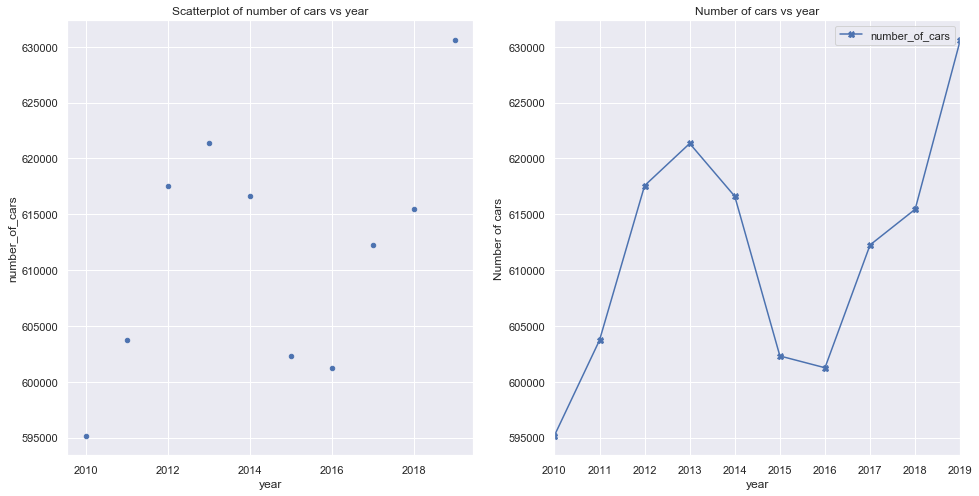

In [1006]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
CatA_all.plot(kind='scatter',y="number_of_cars",x='year',ax=ax1,
                 title="Scatterplot of number of cars vs year")

ax2=fig.add_subplot(122)
CatA_all.plot(kind='line',x='year',y='number_of_cars',ax=ax2,marker='X')
ax2.set_ylabel("Number of cars")
ax2.set_title("Number of cars vs year")
plt.show()


<div class="alert alert-block alert-info">
<b> The number of cars over the years display seasonal pattern.</b><br> 
</div>

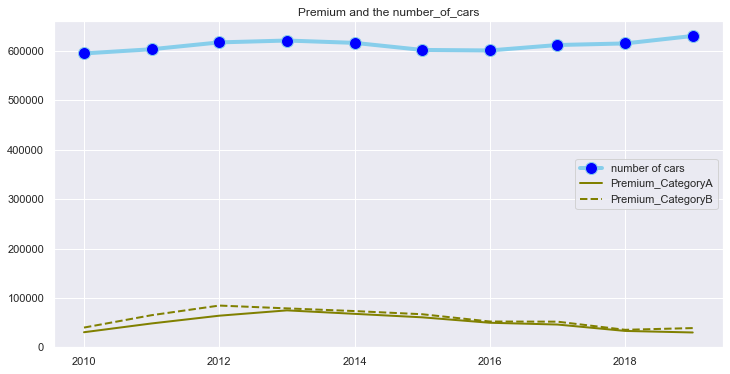

In [1008]:
plt.figure(figsize=(12,6))
# Data
df_plot=pd.DataFrame({'year': range(2010,2020), 'y_1': CatA_all['number_of_cars'], 'y_2': CatA_all['premium'], 'y_3': CatB_all['premium'] })
 
# multiple line plot
plt.plot( 'year', 'y_1', data=df_plot, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='number of cars')
plt.plot( 'year', 'y_2', data=df_plot, marker='', color='olive', linewidth=2,label='Premium_CategoryA')
plt.plot( 'year', 'y_3', data=df_plot, marker='', color='olive', linewidth=2, linestyle='dashed',label="Premium_CategoryB")
plt.title("Premium and the number_of_cars")
plt.legend()


Text(0.5, 1.0, 'Cost of premium (Category B) from 2010-2019')

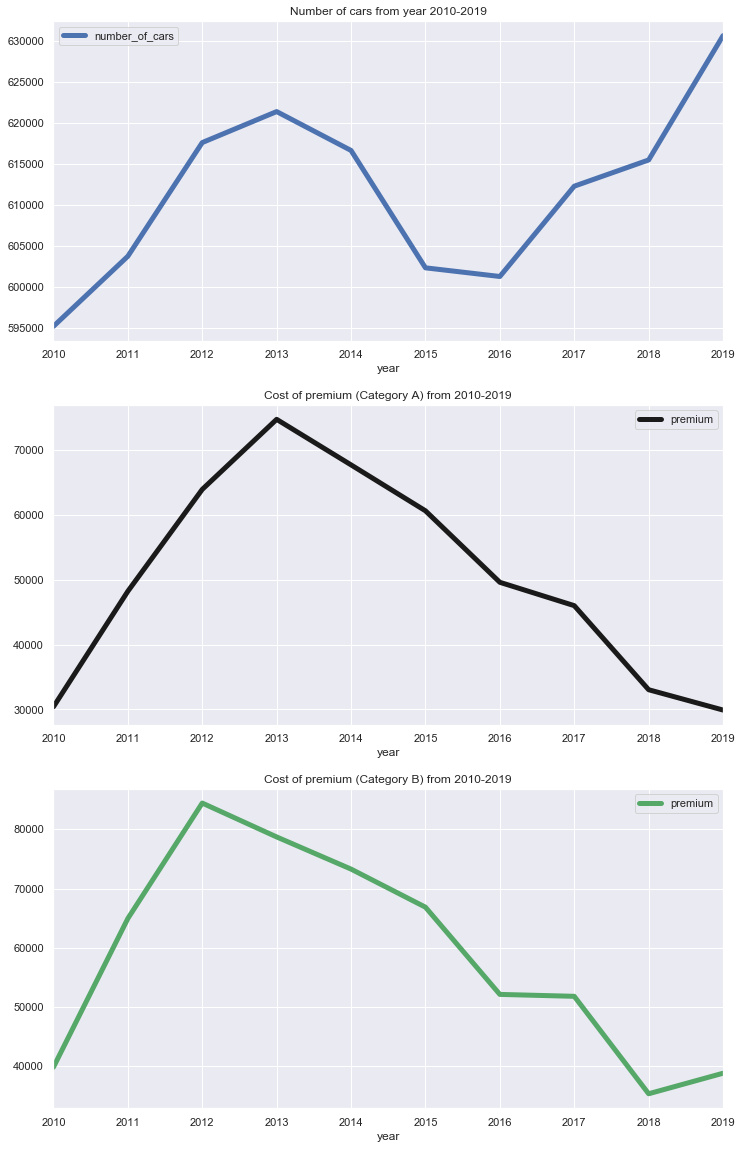

In [1009]:
fig = plt.figure(figsize = (12,20))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)


CatA_all.plot(kind='line', y = 'number_of_cars',x="year",
                  ax = ax1, color = 'b', lw = 5)
CatA_all.plot(kind='line', y = 'premium',x="year",
                  ax = ax2, color = 'k', lw = 5)
CatB_all.plot(kind='line', y = 'premium',x="year",
                  ax = ax3, color = 'g', lw = 5)

ax1.set_title("Number of cars from year 2010-2019")
ax2.set_title("Cost of premium (Category A) from 2010-2019")
ax3.set_title("Cost of premium (Category B) from 2010-2019")



<div class="alert alert-block alert-info">
<b>Interestingly, from 2010 to 2012, the number of cars increases when the cost of premium for both Category A and B car increases.</b><br> 
<b>On the other hand, from 2013 to 2015 the number of car decreases as the cost of premium decreases for both Category A and B.</b><br>
<b>From 2016-2019 the number of cars increases when the cost of premium decreases for both Category.</b><br>
</div>

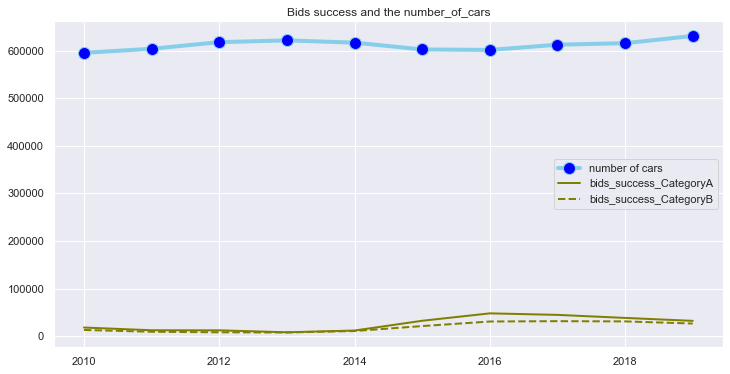

In [1011]:
plt.figure(figsize = (12,6))


df_plot=pd.DataFrame({'year': range(2010,2020), 'y_1': CatA_all['number_of_cars'], 'y_2': CatA_all['bids_success'], 'y_3': CatB_all['bids_success'] })
 
# multiple line plot
plt.plot( 'year', 'y_1', data=df_plot, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='number of cars')
plt.plot( 'year', 'y_2', data=df_plot, marker='', color='olive', linewidth=2,label='bids_success_CategoryA')
plt.plot( 'year', 'y_3', data=df_plot, marker='', color='olive', linewidth=2, linestyle='dashed',label="bids_success_CategoryB")
plt.title("Bids success and the number_of_cars")
plt.legend()



Text(0.5, 1.0, 'number of bids_success(Category B) from 2010-2019')

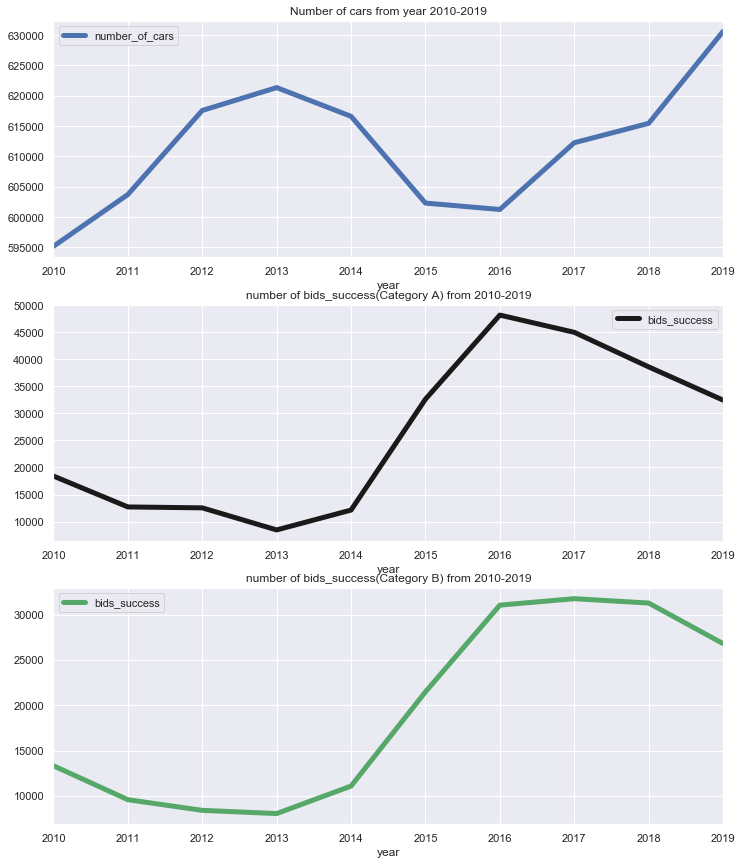

In [1012]:
fig = plt.figure(figsize = (12,20))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)

CatA_all.plot(kind='line', y = 'number_of_cars',x="year",
                  ax = ax1, color = 'b', lw = 5)
CatA_all.plot(kind='line', y = 'bids_success',x="year",
                  ax = ax2, color = 'k', lw = 5)
CatB_all.plot(kind='line', y = 'bids_success',x="year",
                  ax = ax3, color = 'g', lw = 5)

ax1.set_title("Number of cars from year 2010-2019")
ax2.set_title("number of bids_success(Category A) from 2010-2019")
ax3.set_title("number of bids_success(Category B) from 2010-2019")


<div class="alert alert-block alert-info">
<b> The number of cars increases when the number of successful bids decreases for both Category A & B, vice versa. This seems to imply that number_of_cars is inversely proportional to number of successful bids (COE).</b><br> 

</div>

Text(0.5, 1.0, 'Average monthly earnings from 2010-2019')

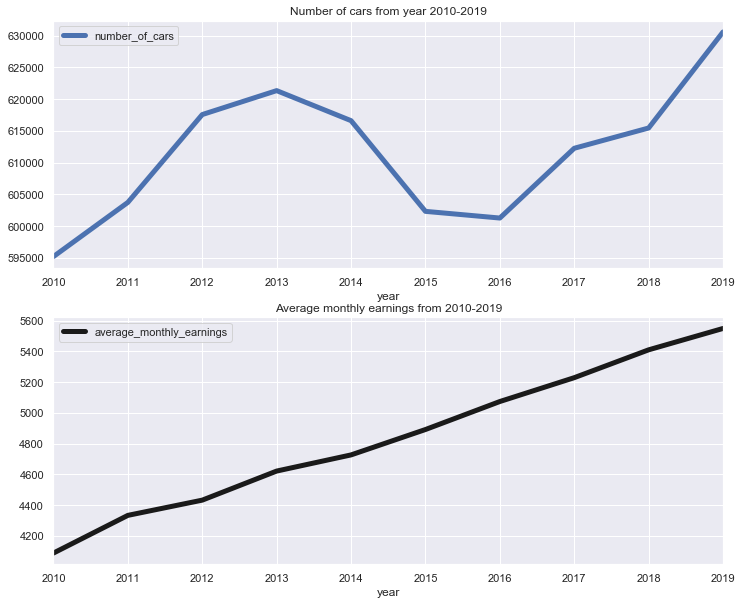

In [1013]:
fig = plt.figure(figsize = (12,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

CatA_all.plot(kind='line', y = 'number_of_cars',x="year",
                  ax = ax1, color = 'b', lw = 5)
CatA_all.plot(kind='line', y = 'average_monthly_earnings',x="year",
                  ax = ax2, color = 'k', lw = 5)
ax1.set_title("Number of cars from year 2010-2019")
ax2.set_title("Average monthly earnings from 2010-2019")


<div class="alert alert-block alert-info">
<b>The number of cars fluctuate from 2010 to 2019, nonetheless there is a general increasing trend.</b><br> 
<b> Similarly, average monthly earnings of Singaporeans increased steadily from 2010-2019.</b><br>
<b>The number of cars could be directly proportional to average monthly earnings </b><br>

</div>

Text(0.5, 1.0, 'Population size from 2010-2019')

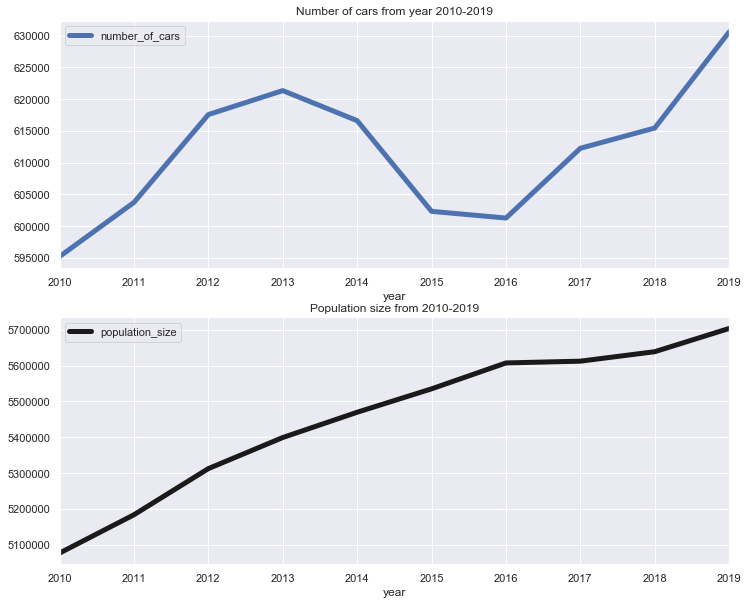

In [1014]:
fig = plt.figure(figsize = (12,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)




CatA_all.plot(kind='line', y = 'number_of_cars',x="year",
                  ax = ax1, color = 'b', lw = 5)
CatA_all.plot(kind='line', y = 'population_size',x="year",
                  ax = ax2, color = 'k', lw = 5)
ax1.set_title("Number of cars from year 2010-2019")
ax2.set_title("Population size from 2010-2019")

<div class="alert alert-block alert-info">
<b>The number of cars fluctuate from 2010 to 2019, nonetheless there is a general increasing trend.</b><br> 
<b> Similarly, Singapore's population increased steadily from 2010-2019.</b><br>
<b>The number of cars could be directly proportional to population size. </b><br>

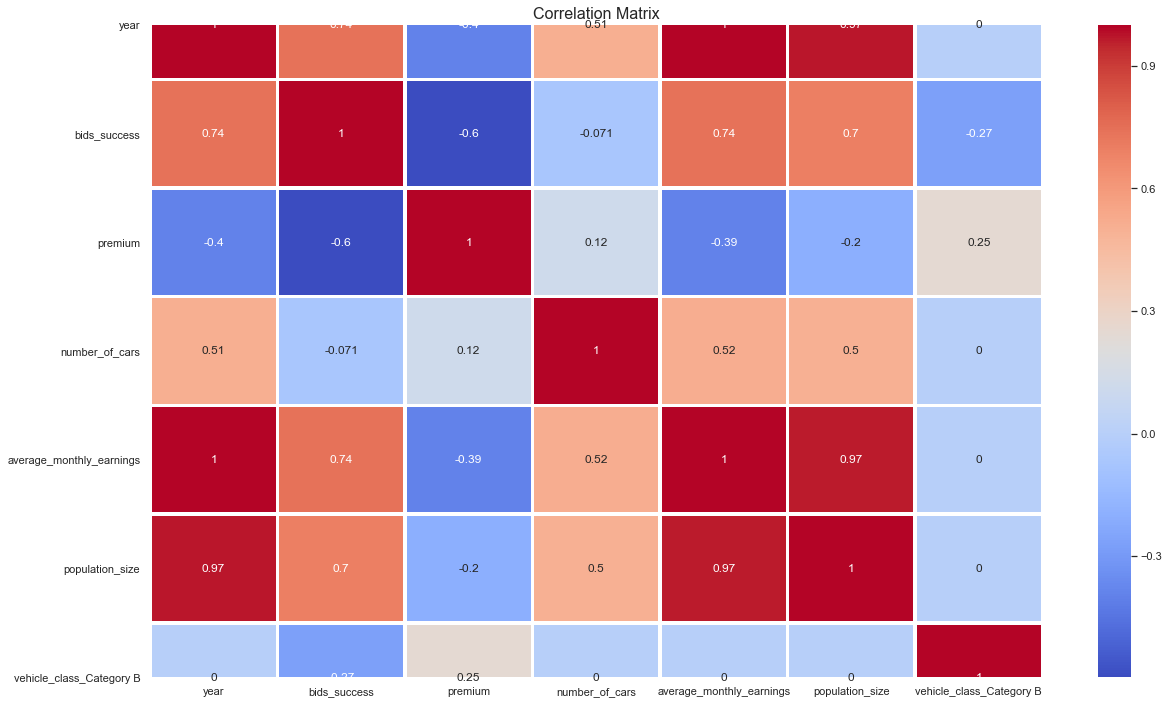

In [1015]:
plt.figure(figsize=(20,12))
final_data_corr =final_data.corr(method='pearson').astype('float64').round(6)
final_data_corr
plt.title('Correlation Matrix', fontsize = 16)
p=sns.heatmap(final_data.corr(),linewidth = 2.5, annot=True, cmap='coolwarm') 

#pd.set_option('precision', 2)
#final_data_corr = final_data_corr.style.background_gradient(cmap ='coolwarm')
#final_data_corr

<div class="alert alert-block alert-info">
    
<b> High correlation (magnitude) indicates strong relationship between two variables. However in building a linear regression model high correlation between 2 independent variables could indicate strong multicollinearity for e.g. average_monthly_earnings and population_size have high correlation of 0.97</b><br> 

</div>

<a id='3'><h2>3. Model Building & Checking Model Adequacy: Mutiple Linear Regression </h2></a>

<a id='3.1'><h3>3.1 Model Building : Stepwise Regression </h3></a>



<img src="stepwise.png" width=800>


In [1017]:
X = final_data[['bids_success','average_monthly_earnings','vehicle_class_Category B']]
y = final_data['number_of_cars']

#statsmodel OLS model
X = sm.add_constant(X)
model = sm.OLS(y,X)
result = model.fit() #fitted=model.fit()
#final_data['fitted_numberofcars'] = result.fittedvalues
display(result.summary())



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         number_of_cars   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     21.74
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           6.88e-06
Time:                        15:25:44   Log-Likelihood:                -196.89
No. Observations:                  20   AIC:                             401.8
Df Residuals:                      16   BIC:                             405.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4.852e+05   1.62e+04     29.991      0.000    4.51e+05     5.2e+05
bids_success                -0.9655      0.146     -6.601      0.000      -1.276      -0.655
average_monthly_earnings    31.3535      3.896      8.048      0.000      23.095      39.612
vehicle_class_Category B -6595.0539   2490.365     -2.648      0.018   -1.19e+04   -1315.715
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.645
Skew:                          -0.071   Prob(JB):                        0.724
Kurtosis:                       2.132   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1018]:
df_result = pd.DataFrame()
df_result['p-values']=result.pvalues
def yes_no(a):
    if a<0.05:
        return 'Yes'
    else:
        return 'No'
df_result['Statistically Significant at 5% significance level?']=df_result['p-values'].apply(yes_no)
df_result

,p-values,Statistically Significant at 5% significance level?
const,0.0,Yes
bids_success,0.0,Yes
average_monthly_earnings,0.0,Yes
vehicle_class_Category B,0.0,Yes


<div class="alert alert-block alert-info">

<b>1. From summary table, the model is significant at 5 % significance level as F-statistic = 21.74 p-value = 6.88e-06 < 0.05 
<br>
<br>

<b>2. All the independent variables are also significant at 5 % significance level with all p-values < 0.05
<br>
<br>
    
<b>3. High R^2 = 0.803 which implies 80% of the variability in y (Number of cars) is explained by this model. Nonetheless as this is a mutiple linear regression model I am inclined to look at adjusted R^2 =0.766 
<br>
<br>

</div>

In [767]:
#df_pred_actual=pd.DataFrame()
#df_pred_actual['y_fitted']=result.fittedvalues
#df_pred_actual['actual']=final_data["number_of_cars"]
#df_pred_actual.reset_index().drop(columns=['index'])

<h2><b> Train Test split</b><br></h2>

In [841]:
X = final_data[['bids_success','average_monthly_earnings','vehicle_class_Category B']]
y = final_data['number_of_cars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_train,y_train)

y_pred = lm.predict(X_test)

r2_score(y_test,y_pred)

#df_pred=pd.DataFrame()
#df_pred['predict']=y_pred

#df=pd.DataFrame(y_test)
#pd.concat([df_pred_actual, df],axis=0) 

0.908908102678958

In [842]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3872.920128324331
Mean Squared Error: 19118697.367365345
Root Mean Squared Error: 4372.49326670326


<div class="alert alert-block alert-danger">
<b> The error of model is pretty high, hence model's prediction may be inaccurate.</b><br>
</div>

<h2><b>Decision Tree</b><br></h2>


X = final_data[['bids_success','average_monthly_earnings','vehicle_class_Category B','premium','population_size']]
y = final_data['number_of_cars']

# Instantiate model
model =  DecisionTreeRegressor(max_depth=5,random_state=0)

# Fit model
model.fit(X,y)

# Print the R-squared value f
model.score(X, y)

X = final_data[['bids_success','average_monthly_earnings','vehicle_class_Category B','premium','population_size']]
y = final_data['number_of_cars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Instantiate model
model =  DecisionTreeRegressor(max_depth=5,random_state=0)

# Fit model
model.fit(X_train,y_train)

# Print the R-squared value f
model.score(X_train, y_train)
y_pred_2 = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))

<a id='3.2'><h3>3.2 Model Adequacy: Assumptions of Linear regression & Multi-collinearity</h3></a>





<h4>1) Linearity: expected value of the dependent variable is a linear function of each independent variable </h4></a>


    

Text(0, 0.5, 'Number of cars')

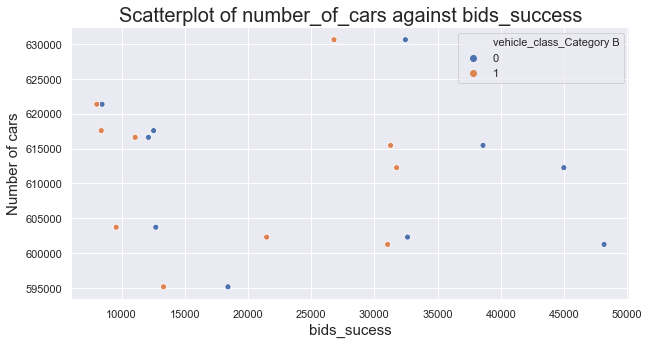

In [1019]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
bidsuccess_numcars_graph = sns.scatterplot(x="bids_success", y="number_of_cars", hue = 'vehicle_class_Category B', data=final_data)
bidsuccess_numcars_graph .axes.set_title("Scatterplot of number_of_cars against bids_success",fontsize=20)
bidsuccess_numcars_graph .set_xlabel("bids_sucess", fontsize=15)
bidsuccess_numcars_graph .set_ylabel("Number of cars", fontsize=15)

Text(0, 0.5, 'Number of cars')

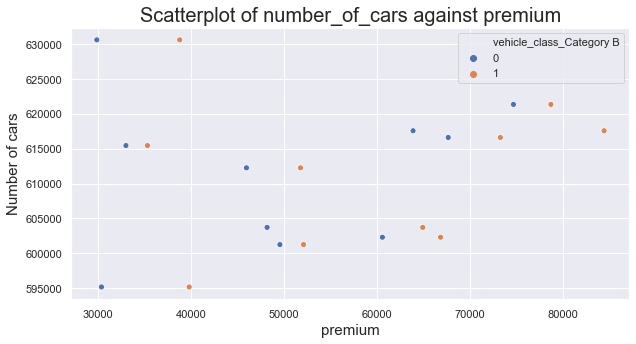

In [1020]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
premium_numcars_graph = sns.scatterplot(x="premium", y="number_of_cars", hue = 'vehicle_class_Category B', data=final_data)
premium_numcars_graph.axes.set_title("Scatterplot of number_of_cars against premium",fontsize=20)
premium_numcars_graph.set_xlabel("premium", fontsize=15)
premium_numcars_graph.set_ylabel("Number of cars", fontsize=15)

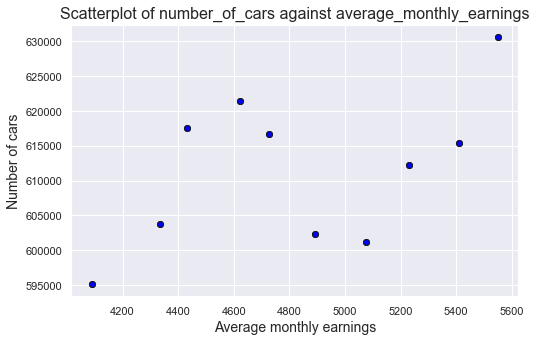

In [1021]:
#for c in final_data.columns[4:5]:
plt.figure(figsize=(8,5))
plt.title("Scatterplot of number_of_cars against average_monthly_earnings",fontsize=16)
plt.scatter(x=final_data["average_monthly_earnings"],y=final_data['number_of_cars'],color='blue',edgecolor='k')
plt.grid(True)
plt.xlabel("Average monthly earnings",fontsize=14)
plt.ylabel('Number of cars',fontsize=14)
plt.show()
    
## curvilinear need to transform

<div class="alert alert-block alert-danger">
<b> While the scatterplot of number_of_cars against bids_success is arguably linear however it is evident that the scatterplot of number_of_cars against average_monthly_earnings is a cubic curve and not linear which violates linearity assumption </b> 
    
<b> May consider adding (average_monthly_earnings)^3 term in the model however this will result in multicollinearity issue
</div>

In [745]:
#fig, ax = plt.subplots()
#ax.scatter(final_data["average_monthly_earnings"],final_data['number_of_cars'], edgecolors=(0, 0, 0))
#ax.plot([final_data["average_monthly_earnings"].min(),final_data['number_of_cars'].max()], [final_data["average_monthly_earnings"].min(),final_data['number_of_cars'].max()], 'k--', lw=4)
#ax.set_xlabel('average_monthly_earnings')
#ax.set_ylabel('Number of cars')
#ax.set_title("Average monthly earnings Salary vs Number of cars")
#plt.show()                                                                                                                                                                             


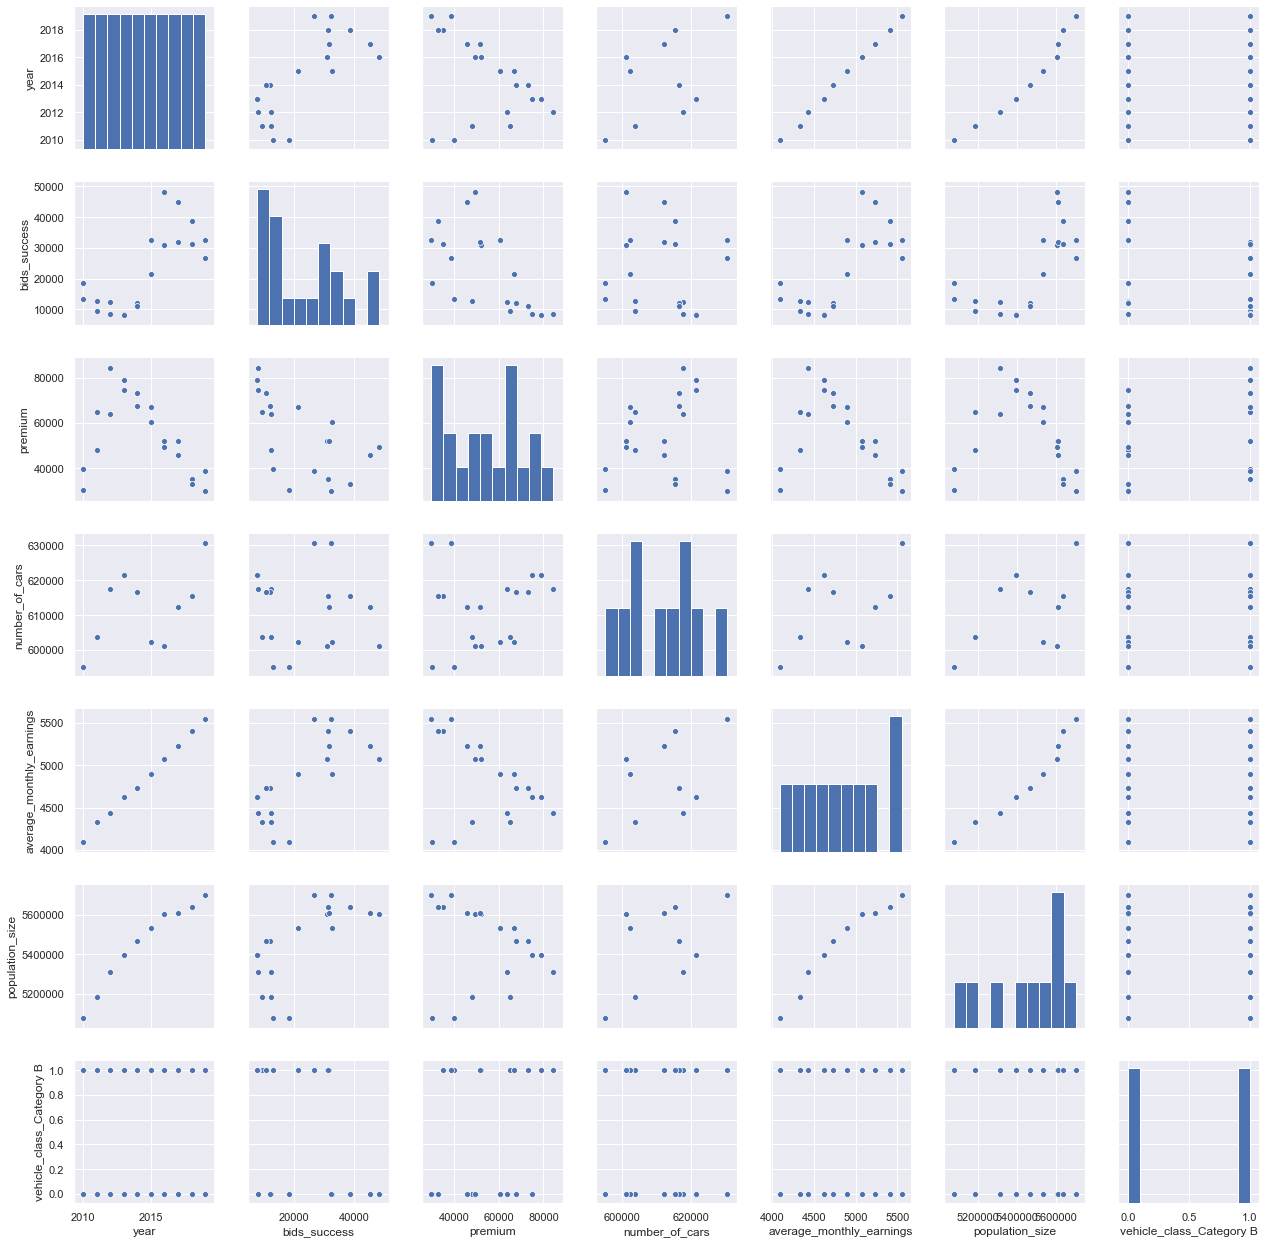

In [1022]:
from seaborn import pairplot

pairplot(final_data)

<div class="alert alert-block alert-info">

<b>By looking at the pairplot, we can check for linearity assumption and if independent variables are correlated. </b><br>


</div>

<h4> 2)Normality: The errors follows a Normal distribution</h4></a>




<Figure size 576x360 with 0 Axes>

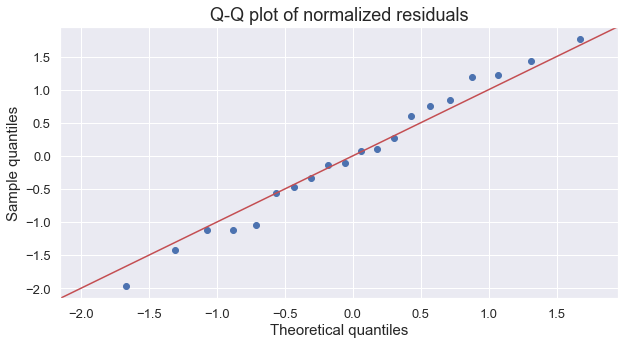

In [1024]:
plt.figure(figsize=(8,5))
fig=qqplot(result.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()



<div class="alert alert-block alert-info">

<b> The normal probability plot of residuals indicates no deviation from normality assumption as points lie relatively close to straight line and looks normal. </b><br>


</div>

<h4>3) Homoscedasticity (constant variance): The variance of the errors is constant with respect to the predicting variables or the response</h4></a>



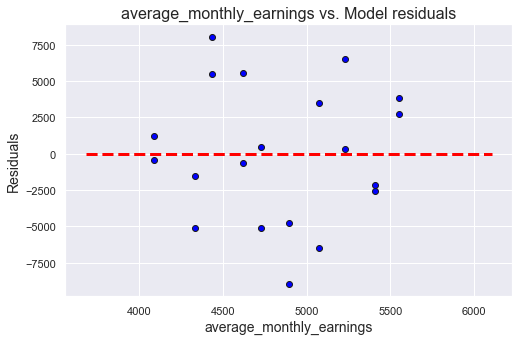

In [1025]:
plt.figure(figsize=(8,5))
plt.title("average_monthly_earnings vs. Model residuals",fontsize=16)
plt.scatter(x=final_data['average_monthly_earnings'],y=result.resid,color='blue',edgecolor='k')
plt.grid(True)
xmin=min(final_data['average_monthly_earnings'])
xmax = max(final_data['average_monthly_earnings'])
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel('average_monthly_earnings',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.show()

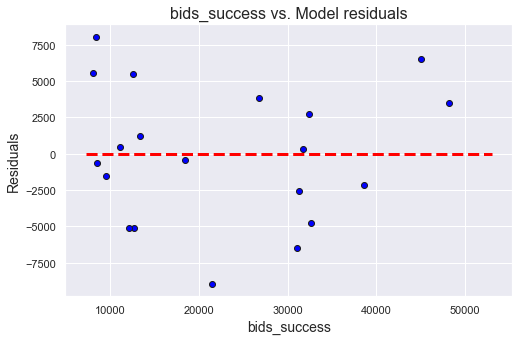

In [1026]:
plt.figure(figsize=(8,5))
plt.title("bids_success vs. Model residuals",fontsize=16)
plt.scatter(x=final_data['bids_success'],y=result.resid,color='blue',edgecolor='k')
plt.grid(True)
xmin=min(final_data['bids_success'])
xmax = max(final_data['bids_success'])
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel('bids_success',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.show()

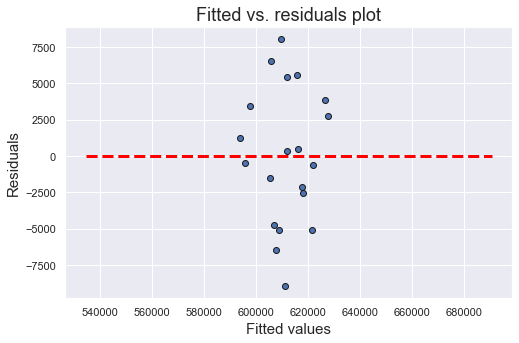

In [1027]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=result.fittedvalues,y=result.resid,edgecolor='k')
xmin=min(result.fittedvalues)
xmax = max(result.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()



<div class="alert alert-block alert-info">

<b>The residual vs independent variable plot and residual vs fitted values plot shows that the variance are pretty stable/constant

</div>

<h4> 4) Independence: errors are uncorrelated/independent (violation leads to autocorrelation problem)</h4></a>

<h4> 5) Check for multi-collinearity using VIF </h4></a>

In [1028]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,201.2,const
1,2.6,bids_success
2,2.4,average_monthly_earnings
3,1.2,vehicle_class_Category B


<div class="alert alert-block alert-info">
<b>By looking at variance inflation factors (VIF), there does not seem to be any indication of strong multicollinearity in the model since no indepedent variables show VIF values > 5 or 10. The high VIF value for the constant could be due to scaling issue.</b><br>
</div>

<a id='4'><h2>4.Evaluation</h2></a>

While the model's R^2 and adjusted R^2 is pretty high, however the RMSE of the model is over 4000, which indicates the inaccuracy of the model.It is thus risky to use this linear model to predict number of cars on SG road. More data is required to develop a more reliable model as current the dataset is too small. Furthermore some of the assumptions of linear regression is violated e.g. linearity assumption.

Moving forward, one could consider building a time series model as the number of cars display season patterns. </h4>

<hr>

<center><h3>Grading</h3></center>

<div class="alert alert-info"><b>Congratulations on the completion of your project, and the course!</b>
    <br>Below is the grade for the project:</div>
<table>
<tr>
    <th>Criteria</th><th>Mark</th>
</tr>
<tr>
    <td>I. Problem Statement / Research Topic</td><td>2 / 2</td>
</tr>  
<tr>
    <td>II. Dataset / Data Prep</td><td>2 / 2</td>
</tr>   
<tr>
    <td>III. Methodology</td><td>2.5 / 3</td>
</tr>   
<tr>
    <td>IV. Insights / Evaluation</td><td>2.5 / 3</td>
</tr> 
<tr>
    <th>Total Mark</th><th>9 / 10</th>
</tr>
</table>
<h3>Further comments:</h3>

* <b>Methodology</b>: Really appreciate the level of statistical rigour shown here! And for this particular problem at hand, this is definitely an interesting and yet hard topic, with many factors at play here. Other than the factors explored thus far, if you want to explore this further, you could also look at a few factors that could indicate people's perception about owning a car - such as perception of MRT/Bus coverage and convenience, and the cost of car maintenance (parking charges etc.). For example, did the decrease in car numbers from 2013 - 2016 due to opening and operation of various new MRT lines? 


* <b>Methodology</b>: You are also right in saying that a time series model could be suitable here as well. In that case, you can use the lagged variables of the factors to forecast future car numbers on road. Overall a good read for me!